In [1]:
import warnings

warnings.filterwarnings('ignore')

## 2.2 开始动手！

### 2.2.1 左侧柱状图部分

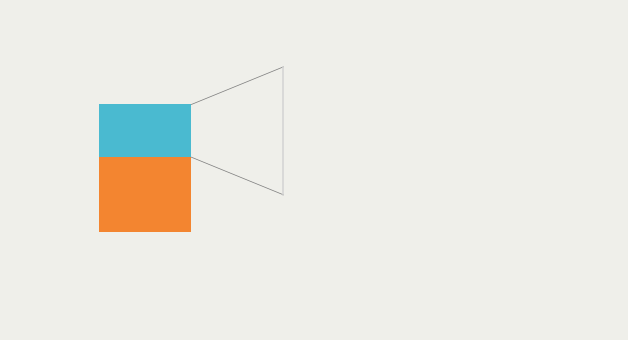

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 创建图床
fig, ax = plt.subplots(figsize=(11, 6))

# 创建buildings对应矩形
ax.add_patch(Rectangle((0, 0), 3e6, 3e6, facecolor='#f38530'))

# 创建transportation对应矩形
ax.add_patch(Rectangle((0, 3e6), 3e6, 2.1e6, facecolor='#4abad0'))

# 添加连接线
ax.plot([3e6, 6e6], [3e6, 3e6-1.5e6], color='grey', linewidth=0.75)
ax.plot([3e6, 6e6], [5.1e6, 5.1e6+1.5e6], color='grey', linewidth=0.75)
ax.plot([6e6, 6e6], [3e6-1.5e6, 5.1e6+1.5e6], color='lightgrey', linewidth=1.5)

# 设置x轴范围
ax.set_xlim(-3e6, 1.7e7)
# 设置y轴范围
ax.set_ylim(-4e6, 9e6)

# 设置背景色
fig.patch.set_facecolor('#efefea')
ax.set_facecolor('#efefea')

# 关闭坐标轴
ax.axis('off');

### 2.2.2 右侧类桑基图部分

In [3]:
import pandas as pd

data = pd.DataFrame({
    '类型': ['Car', 'Freight', 'Street Lights', 'GO Train', 'BRT', 'Bus', 'Taxi', 'Motorcycle'],
    '份额': [0.8628, 0.0933, 0.0005, 0.001, 0.0121, 0.0133, 0.0165, 0.0005]
})

data['份额累加'] = data['份额'].cumsum()
data

,类型,份额,份额累加
0,Car,0.8628,0.8628
1,Freight,0.0933,0.9561
2,Street Lights,0.0005,0.9566
3,GO Train,0.0010,0.9576
4,BRT,0.0121,0.9697
5,Bus,0.0133,0.9830
6,Taxi,0.0165,0.9995
7,Motorcycle,0.0005,1.0000


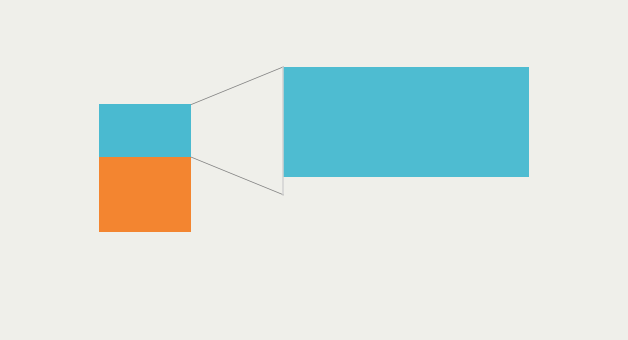

In [4]:
# 创建图床
fig, ax = plt.subplots(figsize=(11, 6))

# 创建buildings对应矩形
ax.add_patch(Rectangle((0, 0), 3e6, 3e6, facecolor='#f38530'))

# 创建transportation对应矩形
ax.add_patch(Rectangle((0, 3e6), 3e6, 2.1e6, facecolor='#4abad0'))

# 添加连接线
ax.plot([3e6, 6e6], [3e6, 3e6-1.5e6], color='grey', linewidth=0.75)
ax.plot([3e6, 6e6], [5.1e6, 5.1e6+1.5e6], color='grey', linewidth=0.75)
ax.plot([6e6, 6e6], [3e6-1.5e6, 5.1e6+1.5e6], color='lightgrey', linewidth=1.5)

height = 5.1e6 + 1.5e6 - (3e6 - 1.5e6)

# 右侧图形
# 最上方矩形
ax.add_patch(Rectangle((6e6, 3e6-1.5e6+0.1372*height),
                       0.8e7,
                       0.8628*height,
                       facecolor='#4ebcd1'))

# 设置x轴范围
ax.set_xlim(-3e6, 1.7e7)
# 设置y轴范围
ax.set_ylim(-4e6, 9e6)

# 设置背景色
fig.patch.set_facecolor('#efefea')
ax.set_facecolor('#efefea')

# 关闭坐标轴
ax.axis('off');

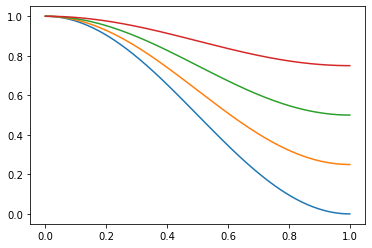

In [5]:
import numpy as np

x, y = np.arange(0.5*np.pi, 1.5*np.pi, 0.001), np.sin(np.arange(0.5*np.pi, 1.5*np.pi, 0.001))

def scale(xlim, ylim):
    
    return (xlim[0] + (xlim[1] - xlim[0]) * (x - x.min()) / (x.max() - x.min()),
            ylim[0] + (ylim[1] - ylim[0]) * (y - y.min()) / (y.max() - y.min()))

plt.plot(*scale((0, 1), (0, 1)))
plt.plot(*scale((0, 1), (0.25, 1)))
plt.plot(*scale((0, 1), (0.5, 1)))
plt.plot(*scale((0, 1), (0.75, 1)));

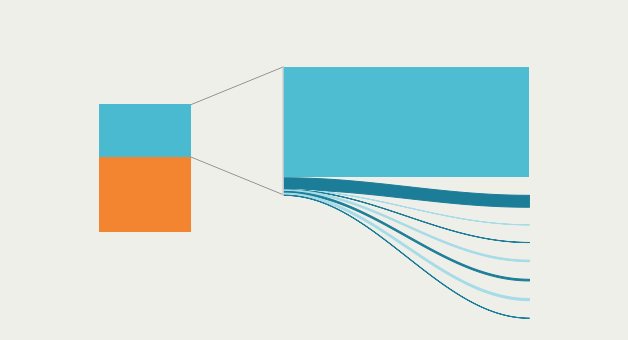

In [6]:
# 创建图床
fig, ax = plt.subplots(figsize=(11, 6))

# 创建buildings对应矩形
ax.add_patch(Rectangle((0, 0), 3e6, 3e6, facecolor='#f38530'))

# 创建transportation对应矩形
ax.add_patch(Rectangle((0, 3e6), 3e6, 2.1e6, facecolor='#4abad0'))

# 添加连接线
ax.plot([3e6, 6e6], [3e6, 3e6-1.5e6], color='grey', linewidth=0.75)
ax.plot([3e6, 6e6], [5.1e6, 5.1e6+1.5e6], color='grey', linewidth=0.75)
ax.plot([6e6, 6e6], [3e6-1.5e6, 5.1e6+1.5e6], color='lightgrey', linewidth=1.5)

height = 5.1e6 + 1.5e6 - (3e6 - 1.5e6)

# 右侧图形
# 最上方矩形
ax.add_patch(Rectangle((6e6, 3e6-1.5e6+0.1372*height),
                       0.8e7,
                       0.8628*height,
                       facecolor='#4ebcd1'))

# 生成每个条带的上下底
bands = [(scale(xlim=(6e6, 6e6+0.8e7), 
                ylim=(5.1e6+1.5e6-data.at[i, '份额累加']*height-(i+1)*7e5,
                      5.1e6+1.5e6-data.at[i, '份额累加']*height)), 
          scale(xlim=(6e6, 6e6+0.8e9),
                ylim=(5.1e6+1.5e6-data.at[i, '份额累加']*height-data.at[i+1, '份额']*height-(i+1)*7e5,
                      5.1e6+1.5e6-data.at[i, '份额累加']*height-data.at[i+1, '份额']*height)))
         for i in range(data.shape[0]-1)]

colors = ['#1b7d98', '#a5dce7']
for i, band in enumerate(bands):
    if i % 2 == 0:
        ax.fill_between(band[0][0], band[0][1], band[1][1], color='#1b7d98')
    else:
        ax.fill_between(band[0][0], band[0][1], band[1][1], color='#a5dce7')

# 设置x轴范围
ax.set_xlim(-3e6, 1.7e7)
# 设置y轴范围
ax.set_ylim(-4e6, 9e6)

# 设置背景色
fig.patch.set_facecolor('#efefea')
ax.set_facecolor('#efefea')

# 关闭坐标轴
ax.axis('off');

### 2.2.3 其他元素的补充

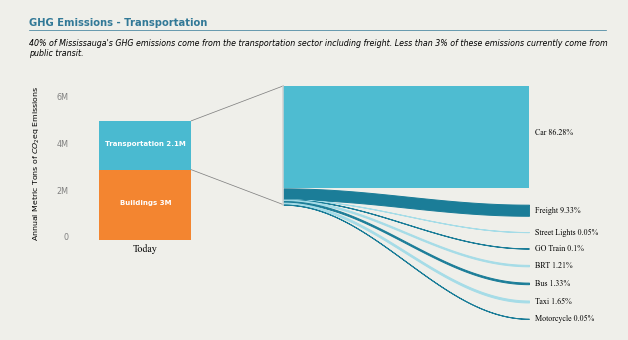

In [7]:
# 创建图床
fig, ax = plt.subplots(figsize=(11, 6))

# 创建buildings对应矩形
ax.add_patch(Rectangle((0, 0), 3e6, 3e6, facecolor='#f38530'))

# 创建transportation对应矩形
ax.add_patch(Rectangle((0, 3e6), 3e6, 2.1e6, facecolor='#4abad0'))

# 添加连接线
ax.plot([3e6, 6e6], [3e6, 3e6-1.5e6], color='grey', linewidth=0.75)
ax.plot([3e6, 6e6], [5.1e6, 5.1e6+1.5e6], color='grey', linewidth=0.75)
ax.plot([6e6, 6e6], [3e6-1.5e6, 5.1e6+1.5e6], color='lightgrey', linewidth=1.5)

height = 5.1e6 + 1.5e6 - (3e6 - 1.5e6)

# 右侧图形
# 最上方矩形
ax.add_patch(Rectangle((6e6, 3e6-1.5e6+0.1372*height),
                       0.8e7,
                       0.8628*height,
                       facecolor='#4ebcd1'))

# 生成每个条带的上下底
bands = [(scale(xlim=(6e6, 6e6+0.8e7), 
                ylim=(5.1e6+1.5e6-data.at[i, '份额累加']*height-(i+1)*7e5,
                      5.1e6+1.5e6-data.at[i, '份额累加']*height)), 
          scale(xlim=(6e6, 6e6+0.8e9),
                ylim=(5.1e6+1.5e6-data.at[i, '份额累加']*height-data.at[i+1, '份额']*height-(i+1)*7e5,
                      5.1e6+1.5e6-data.at[i, '份额累加']*height-data.at[i+1, '份额']*height)))
         for i in range(data.shape[0]-1)]

colors = ['#1b7d98', '#a5dce7']
for i, band in enumerate(bands):
    if i % 2 == 0:
        ax.fill_between(band[0][0], band[0][1], band[1][1], color='#1b7d98')
    else:
        ax.fill_between(band[0][0], band[0][1], band[1][1], color='#a5dce7')
        
# 其它元素的补充

# y轴数值标签
for y_, text in zip([0, 2e6, 4e6, 6e6], ['0', '2M', '4M', '6M']):
    ax.text(-1e6, y_, text, ha='right', color='grey', fontsize=8)

# 添加左侧矩形内部标注
ax.text(1.5e6, 1.5e6, 'Buildings 3M', color='white', 
        ha='center', fontsize=7, fontweight='bold')
ax.text(1.5e6, 3e6+1.05e6, 'Transportation 2.1M', 
        color='white', ha='center', fontsize=7, fontweight='heavy')

# 添加黑色Today标注
ax.text(1.5e6, -5e5, 'Today', 
        color='black', ha='center', 
        fontsize=10, family='Times New Roman')

# 添加右侧文字标注
ax.text(1.42e7, 4.5e6, 'Car 86.28%', fontsize=8, family='Times New Roman')
for i in range(data.shape[0]-1):
    ax.text(1.42e7, 5.1e6+1.5e6-data.at[i, '份额累加']*height-data.at[i+1, '份额']*0.5*height-(i+1)*7e5,
            '{} {}%'.format(data.at[i+1, '类型'], round(data.at[i+1, '份额']*100, 2)),
            va='center', fontsize=8, family='Times New Roman')

# 添加y轴标题
ax.text(-2.2e6, 3.3e6, 'Annual Metric Tons of $CO_{2}$eq Emissions', 
        rotation=90, va='center', fontsize=7.8)

# 上部分隔线
ax.plot([-2.3e6, 1.65e7], [9e6, 9e6], color='#327997', linewidth=0.7)

# 上部黑色说明文字
ax.text(-2.3e6, 
        7.9e6, 
        "40% of Mississauga's GHG emissions come from the transportation sector including freight. Less than 3% of these emissions currently come from \npublic transit.",
        fontsize=7.9,
        style='italic')

# 上部标题
ax.text(-2.3e6, 9.2e6, 'GHG Emissions - Transportation', 
        color='#327997', fontweight='heavy')

# 设置x轴范围
ax.set_xlim(-3e6, 1.7e7)
# 设置y轴范围
ax.set_ylim(-4e6, 10e6)

# 设置背景色
fig.patch.set_facecolor('#efefea')
ax.set_facecolor('#efefea')

# 关闭坐标轴
ax.axis('off');

fig.savefig('图10.png', dpi=500, pad_inches=0, bbox_inches='tight')